<a href="https://colab.research.google.com/github/adithyaprabhu007/math-coding-notes/blob/main/SGD_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

R-squared score (SGD) is: 0.9389898012117259
Mean Squared Error (SGD): 750353.3767984519
Cross-validation R-squared scores (SGD): [0.69277874 0.97921802 0.9924513  0.97620863 0.9412643 ]
Mean R-squared from cross-validation (SGD): 0.9163841975802999
Standard deviation of R-squared from cross-validation (SGD): 0.11307667826807302


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


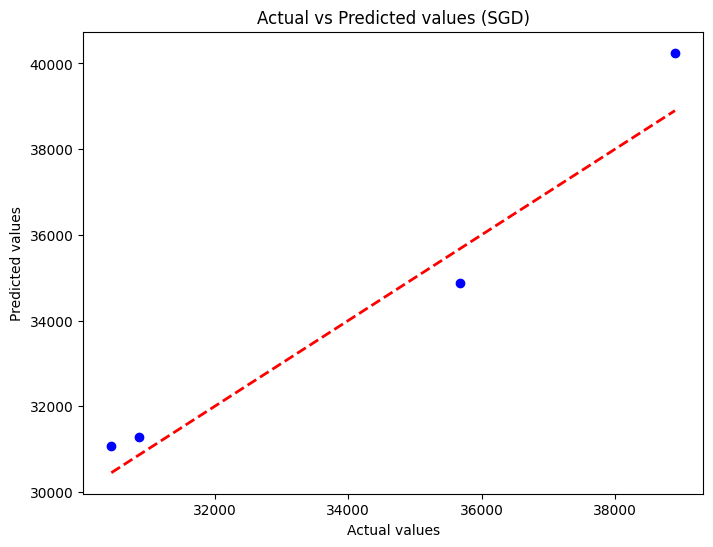

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/multiple_linear_regression_dataset.csv')

# Display a random sample of the dataset
df.sample()

# Shape of the dataset
df.shape

# Split the data into features (X) and target (y)
X = df.drop('income', axis=1)
y = df['income']

# Split into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler to the training and test sets
scr = StandardScaler()
x_train = scr.fit_transform(x_train)  # Fit and transform on the training data
x_test = scr.transform(x_test)        # Only transform the test data (using training data stats)

# Create the SGDRegressor model (SGD for linear regression)
sgd = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

# Fit the model to the training data
sgd.fit(x_train, y_train)

# Make predictions on the test data
y_pred_sgd = sgd.predict(x_test)

# Evaluate the model using R-squared
print("R-squared score (SGD) is:", r2_score(y_test, y_pred_sgd))

# Optionally, calculate Mean Squared Error (MSE)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
print("Mean Squared Error (SGD):", mse_sgd)

# Perform cross-validation on the training data
cv_scores_sgd = cross_val_score(sgd, x_train, y_train, cv=5, scoring='r2')

# Print the cross-validation scores
print("Cross-validation R-squared scores (SGD):", cv_scores_sgd)
print("Mean R-squared from cross-validation (SGD):", cv_scores_sgd.mean())
print("Standard deviation of R-squared from cross-validation (SGD):", cv_scores_sgd.std())

# Visualize the predictions vs actual values (optional)
